In [42]:
from attention import AttentionLayer

In [43]:
import pandas as pd
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import train_test_split
from pyLDAvis import sklearn as sklearn_lda
from keras import backend as K 
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
import numpy as np      
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [44]:
#Import dataset
covid_df = pd.read_excel("covid_19_myths_data_simple.xlsx")

In [45]:
#Extract only topic columns and calculate column sum
count = {}
for i in covid_df.iloc[:, 4:-1].columns:
    count[i] = covid_df[i].sum()

#Sort the sum and extract 5 columns with highest sum
topic_top5 = sorted([x[0] for x in sorted(count.items(), key=lambda item: item[1])[-5:]])

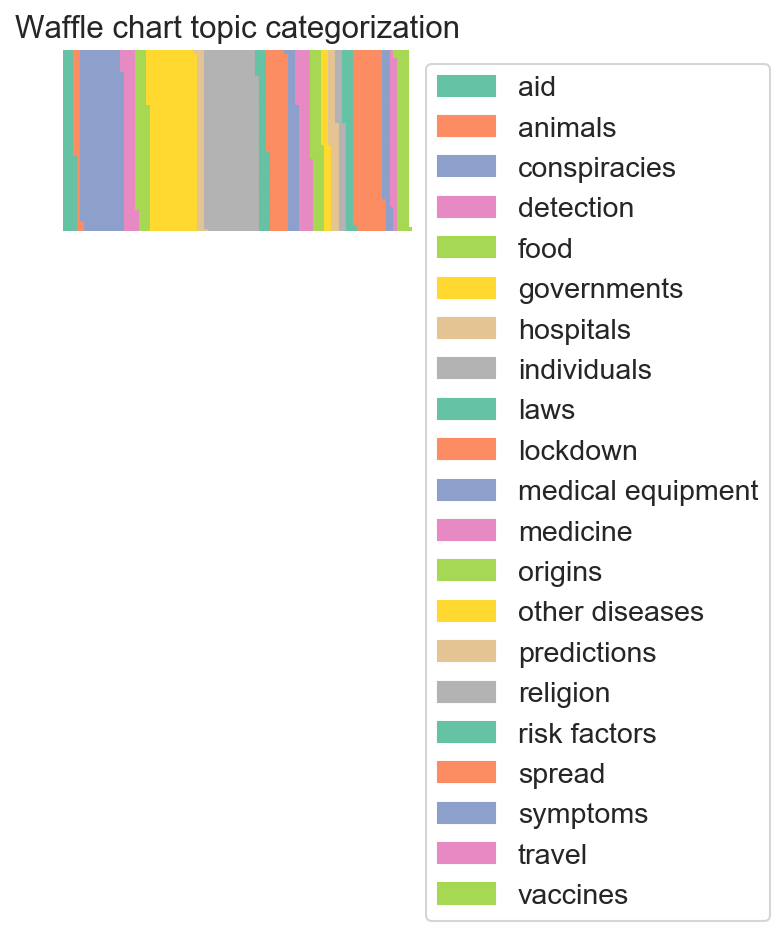

In [46]:
fig = plt.figure(
    FigureClass = Waffle,
    rows = 50,
    values = count,
    labels = list(covid_df.iloc[:, 4:-1].columns),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize = (3,2),
    dpi = 150)
plt.title('Waffle chart topic categorization')
plt.show()

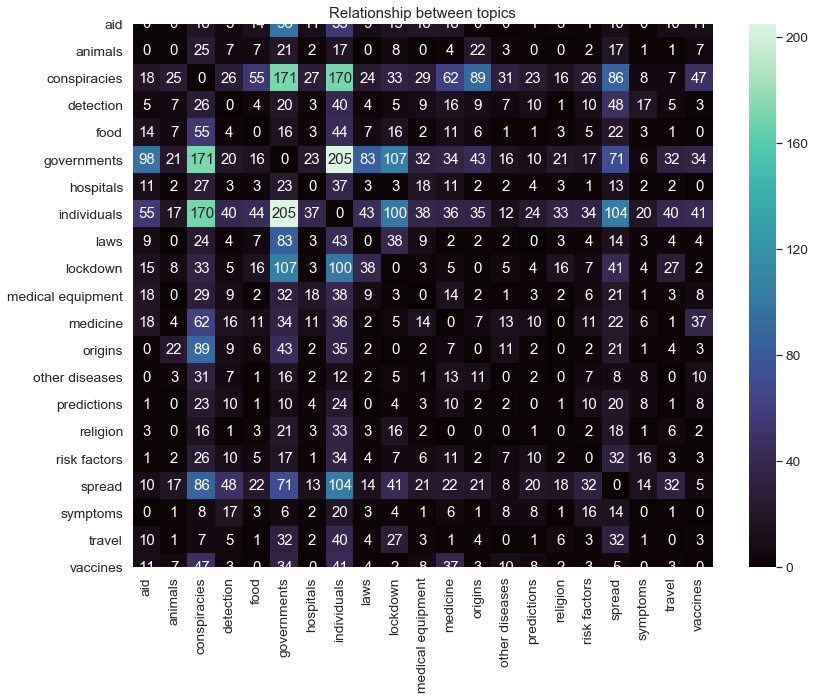

In [47]:
mapdf = pd.DataFrame(columns= list(covid_df.iloc[:, 4:-1].columns), index= list(covid_df.iloc[:, 4:-1].columns))

for i in covid_df.iloc[:, 4:-1].columns:    
    mapdf[i]= covid_df.iloc[:, 4:-1][covid_df[i] == 1].drop(columns= i).sum()

mapdf.fillna(0, inplace=True)
mapdf = mapdf.astype('int32')

fig, ax = plt.subplots(figsize=(13,10)) 
sns.heatmap(mapdf, cmap="mako", annot=True, ax= ax, fmt='g')
plt.title('Relationship between topics')
plt.show()

In [48]:
#Create true and false dataset
truedf = covid_df[covid_df['label'] == 'true'].copy()
falsedf = covid_df[covid_df['label'] != 'true'].copy()

In [49]:
#Calculate the columns sum for true dataset
count = {}
for i in truedf.iloc[:, 4:-1].columns:
    count[i] = truedf[i].sum()

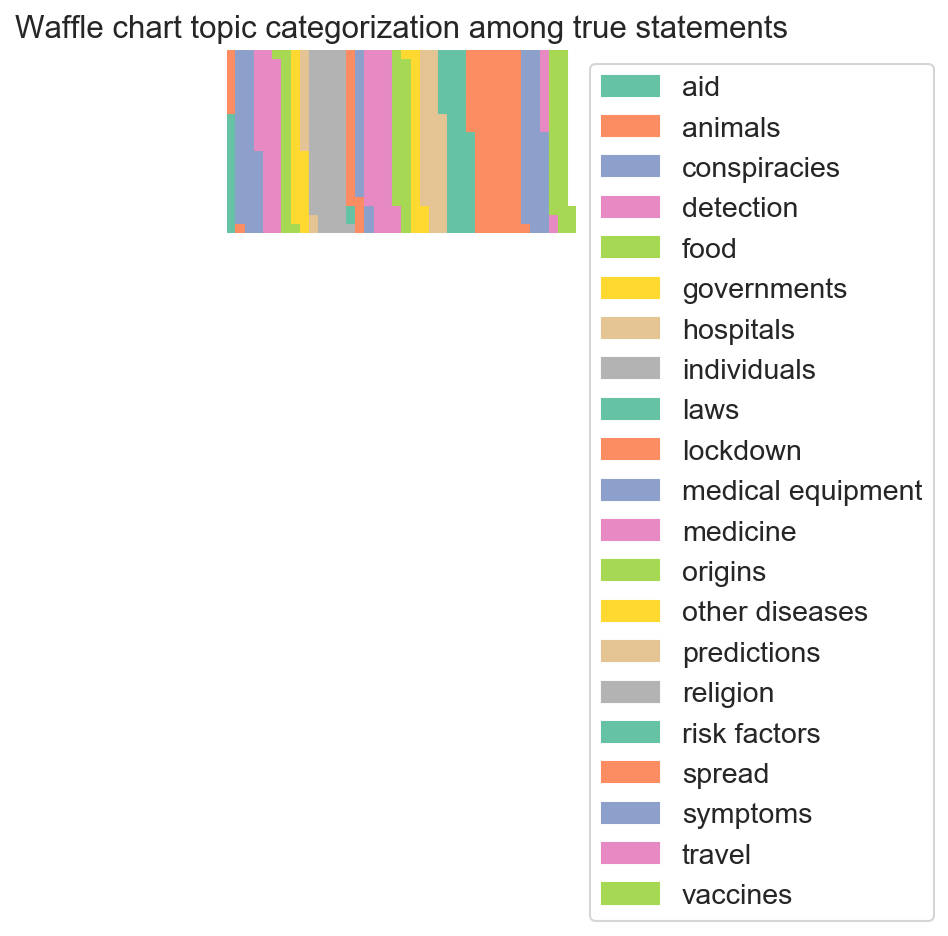

In [50]:
fig = plt.figure(
    FigureClass = Waffle,
    rows = 20,
    values = count,
    labels = list(truedf.iloc[:, 4:-1].columns),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize = (3,2),
    dpi = 150)
plt.title('Waffle chart topic categorization among true statements')
plt.show()

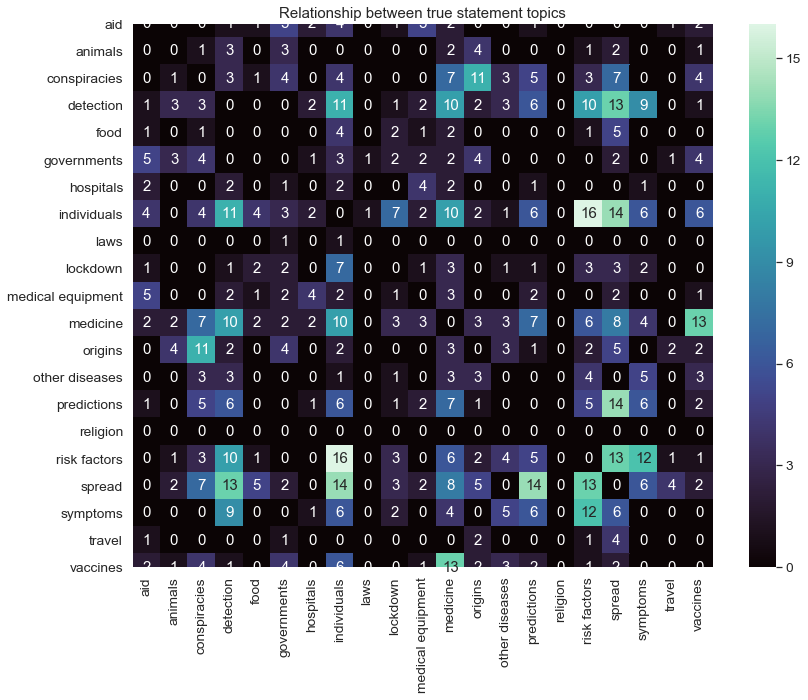

In [51]:
mapdf = pd.DataFrame(columns= list(truedf.iloc[:, 4:-1].columns), index= list(truedf.iloc[:, 4:-1].columns))

for i in truedf.iloc[:, 4:-1].columns:    
    mapdf[i]= truedf.iloc[:, 4:-1][truedf[i] == 1].drop(columns= i).sum()

mapdf.fillna(0, inplace=True)
mapdf = mapdf.astype('int32')

fig, ax = plt.subplots(figsize=(13,10)) 
sns.heatmap(mapdf, cmap="mako", annot=True, ax= ax, fmt='g')
plt.title('Relationship between true statement topics')
plt.show()

In [52]:
#Calculate the columns sum for false dataset
count = {}
for i in falsedf.iloc[:, 4:-1].columns:
    count[i] = falsedf[i].sum()

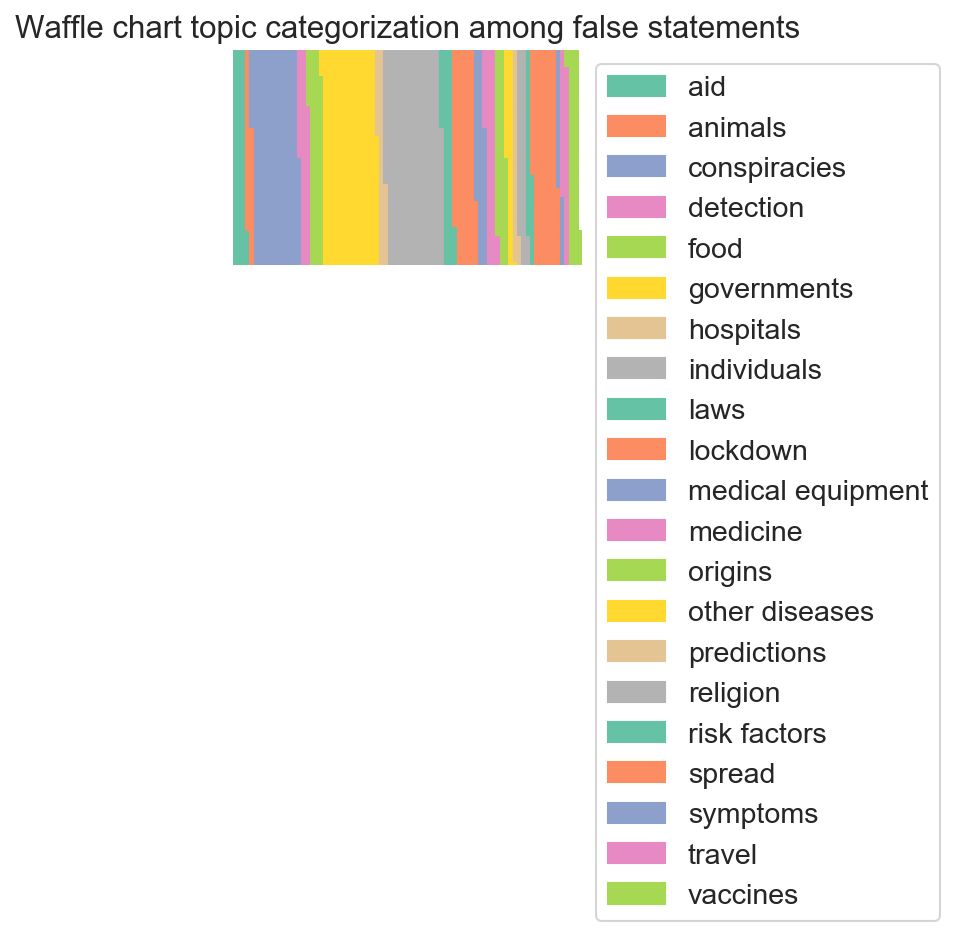

In [53]:
fig = plt.figure(
    FigureClass = Waffle,
    rows = 50,
    values = count,
    labels = list(falsedf.iloc[:, 4:-1].columns),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize = (3,2),
    dpi = 150)
plt.title('Waffle chart topic categorization among false statements')
plt.show()

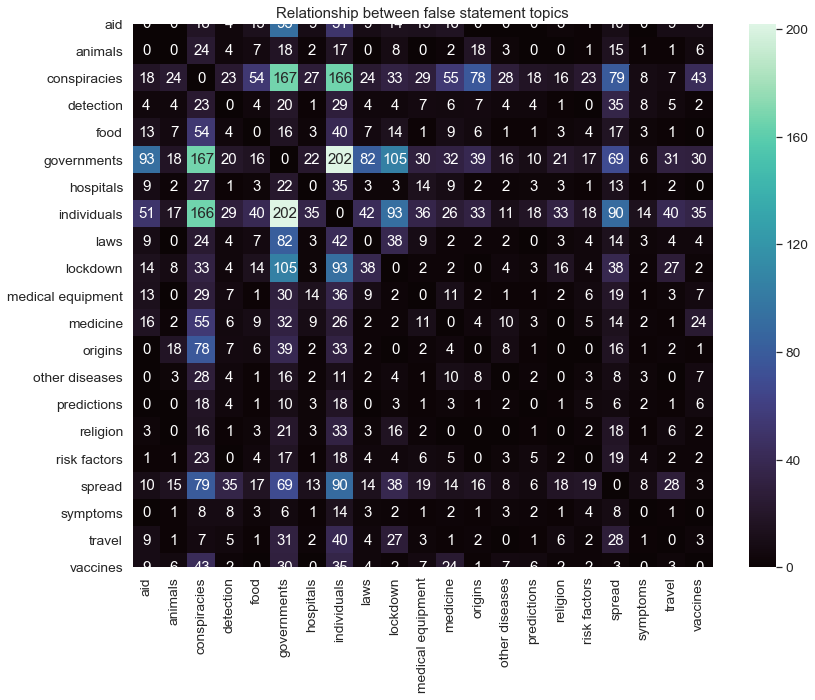

In [54]:
mapdf = pd.DataFrame(columns= list(falsedf.iloc[:, 4:-1].columns), index= list(falsedf.iloc[:, 4:-1].columns))

for i in falsedf.iloc[:, 4:-1].columns:    
    mapdf[i]= falsedf.iloc[:, 4:-1][falsedf[i] == 1].drop(columns= i).sum()

mapdf.fillna(0, inplace=True)
mapdf = mapdf.astype('int32')

fig, ax = plt.subplots(figsize=(13,10)) 
sns.heatmap(mapdf, cmap="mako", annot=True, ax= ax, fmt='g')
plt.title('Relationship between false statement topics')
plt.show()

# Question 2:

In [55]:
print('The top 5 topics with highest count are:', topic_top5)

The top 5 topics with highest count are: ['conspiracies', 'governments', 'individuals', 'lockdown', 'spread']


In [56]:
#Dataset with top 5 columns and summary column
top5_df = covid_df[['summary'] + topic_top5].copy()

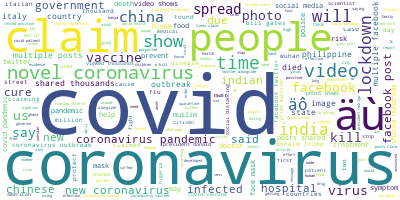

In [57]:
top5_df['summary_processed'] = top5_df['summary'].map(lambda x: re.sub('[,\.!?]', '', x))
top5_df['summary_processed'] = top5_df['summary_processed'].map(lambda x: x.lower())

long_string = ','.join(list(top5_df['summary_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [58]:
sns.set_style('whitegrid')
%matplotlib inline

In [59]:
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

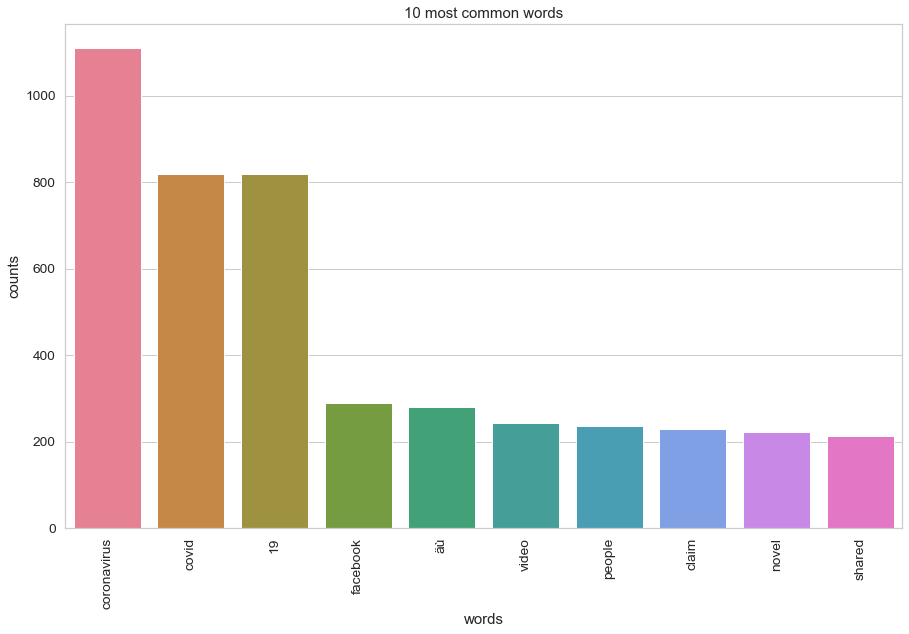

In [60]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(top5_df['summary_processed'])
plot_10_most_common_words(count_data, count_vectorizer)

In [61]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

number_topics = 5
number_words = 20
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
coronavirus facebook claim shared posts times novel multiple thousands shows twitter video pandemic alongside people new viewed hundreds äôs äù

Topic #1:
19 covid coronavirus lockdown äù indian minister äôs government india video prime social country people news pandemic home mask media

Topic #2:
coronavirus covid 19 cure people india video outbreak äù china virus water shows novel cases lockdown patients spread health drinking

Topic #3:
coronavirus covid 19 vaccine äù president trump people new infected donald says gates virus risk said died dr long city

Topic #4:
covid 19 coronavirus claims äù symptoms spread social video shows china people italy image india vaccine äôs indian lockdown photo


# Question 3:

In [62]:
covid_df.drop_duplicates(subset=['text'],inplace= True)
covid_df.dropna(axis=0,inplace=True)  

In [63]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [64]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in covid_df['text']:
    cleaned_text.append(text_cleaner(t))

In [65]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

#Call the above function
cleaned_summary = []
for t in covid_df['summary']:
    cleaned_summary.append(summary_cleaner(t))

covid_df['cleaned_text']=cleaned_text
covid_df['cleaned_summary']=cleaned_summary
covid_df['cleaned_summary'].replace('', np.nan, inplace=True)
covid_df.dropna(axis=0,inplace=True)

covid_df['cleaned_summary'] = covid_df['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [66]:
#Print cleaned text and cleaned summary
for i in range(5):
    print("Text:",covid_df['cleaned_text'][i])
    print("Summary:",covid_df['cleaned_summary'][i])
    print("\n")

Text: stay aware latest information covid outbreak available website national local public health authority people become infected experience mild illness recover severe others take care health protect others following wash hands frequently regularly thoroughly clean hands alcohol based hand rub wash soap water washing hands soap water using alcohol based hand rub kills viruses may hands maintain social distancing maintain least metre distance anyone coughing sneezing someone coughs sneezes spray small liquid droplets nose mouth may contain virus close breathe droplets including covid virus person coughing disease avoid touching eyes nose mouth hands touch many surfaces pick viruses contaminated hands transfer virus eyes nose mouth virus enter body make sick practice respiratory hygiene make sure people around follow good respiratory hygiene means covering mouth nose bent elbow tissue cough sneeze dispose used tissue immediately droplets spread virus following good respiratory hygiene 

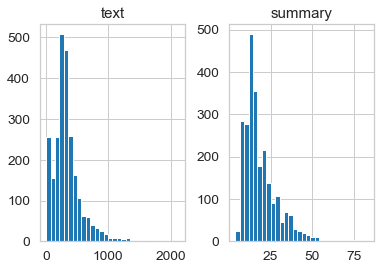

In [67]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in covid_df['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in covid_df['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [68]:
max_len_text=80 
max_len_summary=10

In [69]:
x_tr,x_val,y_tr,y_val= train_test_split(covid_df['cleaned_text'], covid_df['cleaned_summary'],test_size=0.1,random_state=0,shuffle=True) 

In [70]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [71]:
#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

In [72]:
from keras import backend as K 
K.clear_session() 
latent_dim = 500 

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 80, 500)      15290000    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 80, 500), (N 2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [73]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [74]:
history= model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
5/5 [==============================] - 140s 23s/step - loss: 7.9971 - val_loss: 6.1401
Epoch 2/50
5/5 [==============================] - 107s 21s/step - loss: 6.0832 - val_loss: 5.8908
Epoch 3/50
5/5 [==============================] - 82s 16s/step - loss: 5.8740 - val_loss: 5.7579
Epoch 4/50
5/5 [==============================] - 82s 16s/step - loss: 5.7937 - val_loss: 5.7077
Epoch 5/50
5/5 [==============================] - 82s 16s/step - loss: 5.6516 - val_loss: 5.7956
Epoch 00005: early stopping


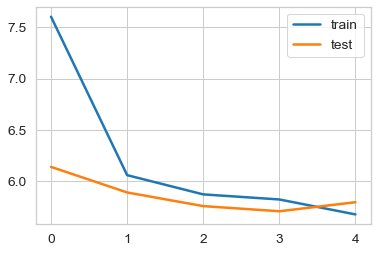

In [75]:
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test') 
plt.legend() 
plt.show()

In [76]:
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [77]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [78]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
            if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [79]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [80]:
for i in range(len(x_val)):
  print("Review:",seq2text(x_val[i]))
  print("Original summary:",seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
  print("\n")

Review: coronavirus available well numerous mask related claims examples copyright afp rights reserved users access consult website use share features available personal private non commercial purposes use particular reproduction communication public distribution content website whole part purpose means without specific licence agreement signed afp strictly prohibited subject matter depicted included via links within fact checking content provided extent necessary correct understanding verification information concerned afp obtained rights authors copyright owners third party content shall incur liability regard afp logo registered trademarks 
Original summary: face masks used to stop the spread of covid 


KeyError: 0